# Big Mart Sales Prediction

# E D A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
test=pd.read_csv('C:/Users/hp/Downloads/test_AbJTz2l.csv')
train=pd.read_csv('C:/Users/hp/Downloads/train_v9rqX0R.csv')
sample=pd.read_csv('C:/Users/hp/Downloads/sample_submission_8RXa3c6.csv')

In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
train['Item_Weight'].mean()

12.857645184136183

In [13]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace = True)

In [14]:
train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [16]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [18]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [20]:
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

In [21]:
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

In [22]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Visualization

<Figure size 432x432 with 0 Axes>

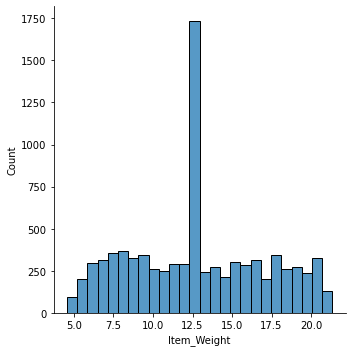

In [25]:
plt.figure(figsize=[6,6])
sns.displot(train['Item_Weight'])
plt.show()

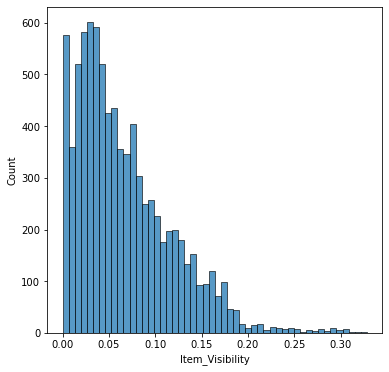

In [26]:
plt.figure(figsize=[6,6])
sns.histplot(train['Item_Visibility'])
plt.show()

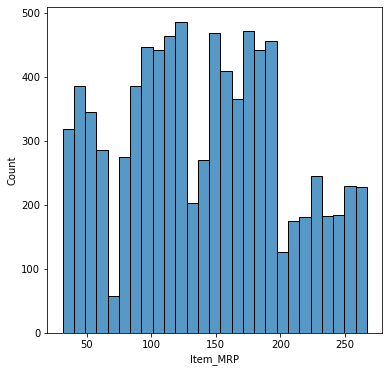

In [27]:
plt.figure(figsize=[6,6])
sns.histplot(train['Item_MRP'])
plt.show()

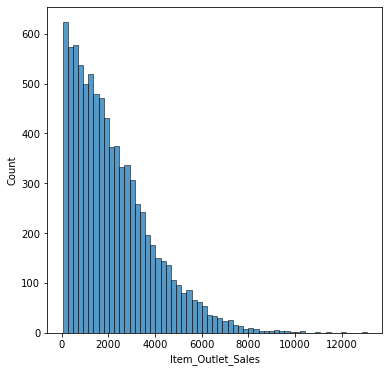

In [28]:
plt.figure(figsize=[6,6])
sns.histplot(train['Item_Outlet_Sales'])
plt.show()

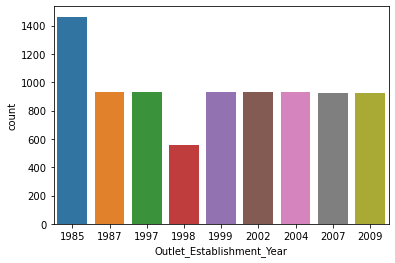

In [29]:
sns.countplot(x=train['Outlet_Establishment_Year'])
plt.show()

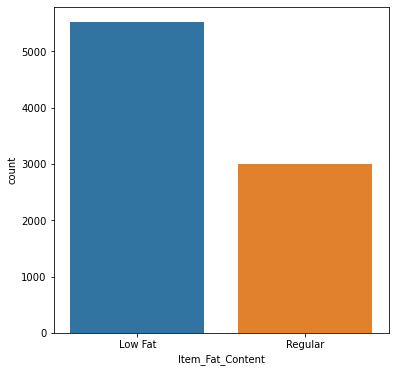

In [30]:
plt.figure(figsize=[6,6])
sns.countplot(x=train['Item_Fat_Content'])
plt.show()

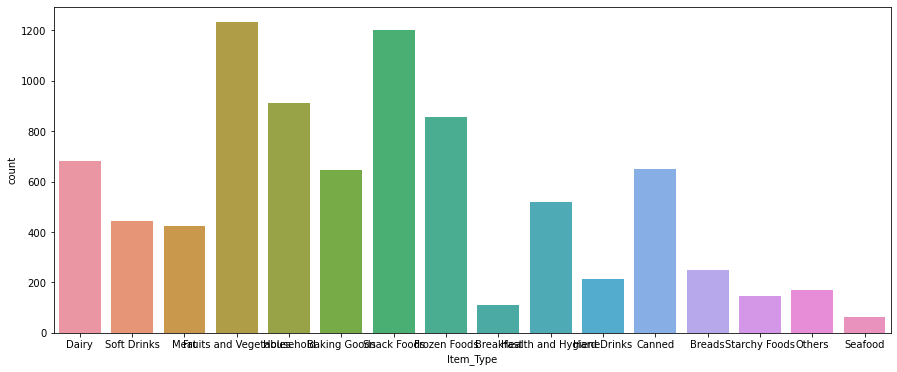

In [31]:
plt.figure(figsize=[15,6])
sns.countplot(x=train['Item_Type'])
plt.show()

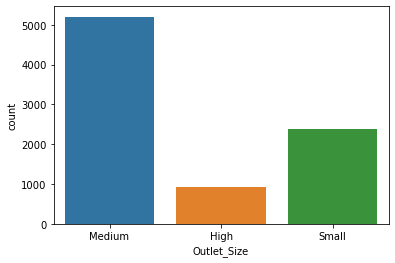

In [32]:
sns.countplot(x=train['Outlet_Size'])
plt.show()

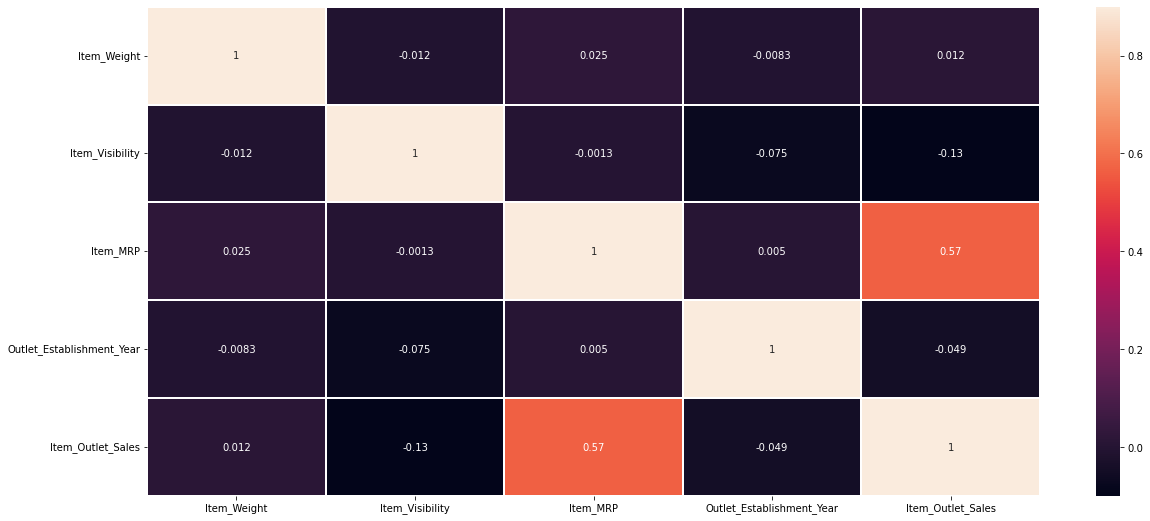

In [33]:
corr=train.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr,annot=True,vmin=-0.1,vmax=0.9,linewidth=.2)
plt.show()

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Pre processing

In [35]:
#label_encoding

In [36]:
Encoder = LabelEncoder()

In [37]:
train['Item_Identifier'] = Encoder.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content'] = Encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = Encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = Encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = Encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = Encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = Encoder.fit_transform(train['Outlet_Type'])

In [38]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [39]:
test=test.apply(Encoder.fit_transform)

In [40]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,404,0,66,13,1460,9,4,1,0,1
1,1067,223,1,1714,4,965,2,7,1,1,1
2,1406,338,0,4042,11,4076,0,3,1,2,0
3,809,156,0,388,13,2522,2,7,1,1,1
4,1184,319,1,4423,4,3972,5,0,1,2,3


In [41]:
from sklearn.preprocessing import OneHotEncoder


In [42]:
#train = pd.get_dummies(train,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [43]:
#train

In [44]:
#x_orig = train_data.drop('Item_Outlet_Sales', axis=1)
#y_orig = pd.DataFrame(train_data['Item_Outlet_Sales'], columns=['Item_Outlet_Sales'])

In [45]:
y=pd.DataFrame(train['Item_Outlet_Sales'], columns=['Item_Outlet_Sales'])
X=train.drop('Item_Outlet_Sales',axis=1)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [47]:
y_train

,Item_Outlet_Sales
1010,692.4320
7430,1749.7224
7503,1743.0644
3632,1102.5648
6965,1877.5560
...,...
1372,2269.0464
919,451.4124
4307,1246.3776
5699,4660.6000


In [48]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6449,690,15.100000,0,0.095351,0,158.6604,7,2002,1,1,1
5635,1503,12.857645,0,0.025354,8,144.4760,5,1985,1,2,3
5966,605,17.700000,0,0.019438,5,95.5410,0,1998,1,2,0
2644,693,16.600000,0,0.000000,5,54.6614,2,2007,1,1,1
6325,1229,6.425000,0,0.093455,6,175.3712,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7585,1236,12.857645,0,0.000000,4,51.2350,4,1985,2,0,0
6567,39,12.100000,0,0.029781,14,146.9444,8,1997,2,0,1
7578,267,15.000000,0,0.118868,13,229.4694,6,2004,2,1,1
5374,989,18.600000,1,0.287017,10,48.8376,0,1998,1,2,0


In [49]:
X.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
#model.fit(x_train, y_train)
#y_pred = pd.DataFrame(model.predict(x_test))

In [52]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions = pd.DataFrame(model.predict(X_test))

In [53]:
#y_test = scale.inverse_transform(y_test)
#y_pred = scale.inverse_transform(y_pred)

#from sklearn import metrics
#print("R2 score", metrics.r2_score(y_test, y_pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [54]:
#y_test = std.inverse_transform(y_test)
#y_pred = std.inverse_transform(predictions)

In [55]:
print('Mean Square Error is :', mean_squared_error(y_test,predictions))
print('R Squared Value is :', r2_score(y_test, predictions))

Mean Square Error is : 1559217.1630470522
R Squared Value is : 0.4959288832291354


In [56]:
predictions.shape

(1705, 1)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
Min_max=MinMaxScaler(feature_range=(0,1))

In [59]:
X1=Min_max.fit_transform(X)

In [60]:
X1=pd.DataFrame(X)

In [61]:
X1.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


# Model Building

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
lr=LinearRegression()
model2=lr.fit(X_train,y_train)
predictions2 = model2.predict(X_test)

In [64]:
print('Mean Square Error is :', mean_squared_error(y_test,predictions2))
print('R Squared Value is :', r2_score(y_test, predictions2))

Mean Square Error is : 1559217.1630470522
R Squared Value is : 0.4959288832291354


In [65]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [66]:
X1=std.fit_transform(X1)

In [67]:
X1=pd.DataFrame(X1)

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
lr=LinearRegression()
model1=lr.fit(X_train,y_train)
predictions1 = model1.predict(X_test)

In [70]:
print('Mean Square Error is :', mean_squared_error(y_test,predictions1))
print('R Squared Value is :', r2_score(y_test, predictions1))

Mean Square Error is : 1291997.4524092984
R Squared Value is : 0.5246461805160524


In [71]:
#sample=pd.DataFrame({'y_test':y_test,'Item_Outlet_Sales':predictions1})
#sample.to_csv("C:/Users/hp/Desktop/sample.csv")

In [72]:
#sample

In [73]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(train.drop(['Item_Outlet_Sales'], axis=1))
x_test=scale.fit_transform(test)
y=scale.fit_transform(pd.DataFrame(train['Item_Outlet_Sales']))

In [74]:
from sklearn.svm import SVR
model = SVR()
model.fit(x,y)

y_pred=pd.DataFrame(model.predict(x_test))
y_pred=scale.inverse_transform(y_pred)

print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_pred.shape)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(8523, 11)
(8523, 1)
(5681, 11)
(5681, 1)


In [75]:
a=pd.DataFrame(test[['Item_Identifier', 'Outlet_Identifier']], columns=['Item_Identifier', 'Outlet_Identifier'])
b=pd.DataFrame(abs(predictions1), columns=['Item_Outlet_Sales'])

new=pd.concat([a,b], axis=1)

display(new)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,1103,9,1084.688127
1,1067,2,610.885597
2,1406,0,1110.883140
3,809,2,4225.208333
4,1184,5,2834.816214
...,...,...,...
5676,231,8,NaN
5677,306,3,NaN
5678,1412,7,NaN
5679,517,2,NaN


In [76]:
new.to_csv('C:/Users/hp/Downloads/submission1.csv', index=False)